In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### часть 1. Исследование связи между ВВП на душу населения и Индексом экономической свободы

In [6]:
index_2022 = pd.read_excel("index_2022.xlsx")
index_2022.head()

,country_id,country_name,region,world_rank,region_rank,score_2022,property_rights,judical_effectiveness,government_integrity,tax_burden,...,gov_expenditure__%_of_GDP,population__millions,GDP__billions_PPP$,GDP_growth_rate__%,GDP_growth_rate_5_year__%,GDP_per_capita __PPP$,unemployment__%,inflation__%,FDI_inflow__millions,public_debt__% _of _GDP
0,1,Afghanistan,Asia-Pacific,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,38.928,78.7,-5.0,1.0,2390.0,11.7,5.61,13.0,7.8
1,2,Albania,Europe,50.0,30.0,66.6,55.5,49.8,35.6,89.1,...,30.5,2.838,40.7,-3.5,2.0,14218.1,11.7,1.60,1107.0,76.0
2,3,Algeria,Middle East and North Africa,167.0,13.0,45.8,27.9,29.7,30.1,67.2,...,37.8,43.851,491.5,-6.0,0.1,11112.2,12.8,2.42,1125.0,53.1
3,4,Angola,Sub-Saharan Africa,139.0,29.0,52.6,39.8,25.3,20.6,86.6,...,21.3,32.866,215.1,-4.0,-1.9,6931.9,7.7,22.28,-1866.0,127.1
4,5,Argentina,Americas,144.0,27.0,50.1,35.1,57.9,45.1,73.3,...,39.6,45.377,941.8,-10.0,-2.8,20751.0,11.7,42.02,4123.0,103.0


In [7]:
index_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country_id                  184 non-null    int64  
 1   country_name                184 non-null    object 
 2   region                      184 non-null    object 
 3   world_rank                  177 non-null    float64
 4   region_rank                 177 non-null    float64
 5   score_2022                  177 non-null    float64
 6   property_rights             177 non-null    float64
 7   judical_effectiveness       177 non-null    float64
 8   government_integrity        177 non-null    float64
 9   tax_burden                  177 non-null    float64
 10  gov_spending                177 non-null    float64
 11  fiscal_health               177 non-null    float64
 12  business_freedom            177 non-null    float64
 13  labor_freedom               177 non

In [3]:
index_2022.describe()

,country_id,world_rank,region_rank,score_2022,property_rights,judical_effectiveness,government_integrity,tax_burden,gov_spending,fiscal_health,...,gov_expenditure__%_of_GDP,population__millions,GDP__billions_PPP$,GDP_growth_rate__%,GDP_growth_rate_5_year__%,GDP_per_capita __PPP$,unemployment__%,inflation__%,FDI_inflow__millions,public_debt__% _of _GDP
count,184.000000,177.000000,177.000000,177.00000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,...,177.000000,184.000000,181.000000,183.000000,183.000000,184.000000,184.000000,184.000000,180.000000,181.000000
mean,93.586957,89.000000,20.203390,59.99887,55.286441,50.233333,45.348023,77.884181,65.036723,60.589831,...,32.542373,41.973217,729.093370,-5.240437,1.426230,19834.470109,7.808696,21.431576,4970.372318,69.244751
std,54.103352,51.239633,12.582157,11.61444,23.938589,26.824001,22.212039,13.377766,24.517711,32.574563,...,13.490816,149.686094,2545.550758,8.918009,3.164756,21113.133186,5.309197,178.397008,21639.775401,44.443688
min,1.000000,1.000000,1.000000,3.00000,0.200000,3.900000,3.800000,0.000000,0.000000,0.000000,...,10.100000,0.038000,0.300000,-64.000000,-23.500000,0.000000,0.000000,-2.720000,-115300.000000,2.900000
25%,46.750000,45.000000,9.000000,53.30000,37.400000,29.200000,29.400000,71.600000,53.500000,36.700000,...,22.800000,2.588500,28.700000,-7.550000,-0.100000,4568.200000,4.375000,0.487500,79.000000,42.800000
50%,93.500000,89.000000,19.000000,59.80000,50.400000,45.800000,41.000000,78.900000,70.200000,70.800000,...,31.500000,9.820000,100.500000,-4.100000,1.500000,12410.950000,6.400000,2.430000,645.500000,60.700000
75%,140.250000,133.000000,30.000000,67.60000,74.200000,74.300000,60.000000,86.900000,84.400000,88.300000,...,39.400000,31.118500,454.700000,-1.300000,2.950000,29105.750000,10.200000,4.952500,3227.000000,84.400000
max,186.000000,177.000000,47.000000,84.40000,100.000000,98.000000,99.500000,100.000000,97.000000,99.700000,...,119.100000,1402.112000,24142.800000,43.400000,12.100000,118001.600000,28.700000,2355.150000,156321.000000,304.100000


In [4]:
score_gdp = index_2022[['score_2022','GDP_per_capita __PPP$']]
score_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   score_2022             177 non-null    float64
 1   GDP_per_capita __PPP$  184 non-null    float64
dtypes: float64(2)
memory usage: 3.0 KB


In [5]:
score_gdp.columns = ['score_2022', 'gdp_per_capita'] # rename columns
score_gdp.head()

,score_2022,gdp_per_capita
0,NaN,2390.0
1,66.6,14218.1
2,45.8,11112.2
3,52.6,6931.9
4,50.1,20751.0


In [6]:
score_gdp = score_gdp.dropna(how='any',axis=0) # delete rows with null values
score_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 1 to 183
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   score_2022      177 non-null    float64
 1   gdp_per_capita  177 non-null    float64
dtypes: float64(2)
memory usage: 4.1 KB


<AxesSubplot:ylabel='score_2022'>

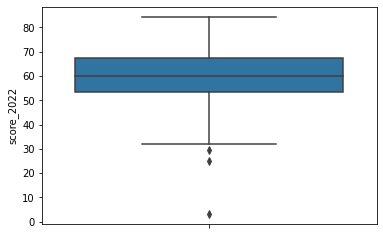

In [7]:
sns.boxplot(data=score_gdp, y='score_2022')

In [8]:
score_gdp = score_gdp[score_gdp['score_2022'] > 20] # убрали выброс < 20

<AxesSubplot:ylabel='score_2022'>

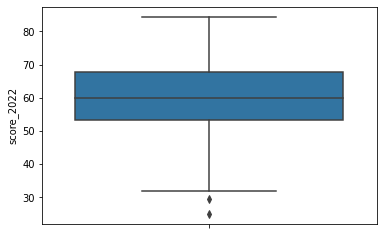

In [9]:
sns.boxplot(data=score_gdp, y='score_2022')

In [10]:
score_gdp.describe()

,score_2022,gdp_per_capita
count,176.000000,176.000000
mean,60.322727,20615.934091
std,10.816450,21248.678250
min,24.800000,759.900000
25%,53.300000,5136.525000
50%,59.900000,12846.150000
75%,67.625000,30321.100000
max,84.400000,118001.600000


In [11]:
params = np.polyfit(score_gdp['score_2022'], score_gdp['gdp_per_capita'],2) # 2 orders
function = np.poly1d(params)
 
print(function)

      2
46.2 x - 4098 x + 9.432e+04


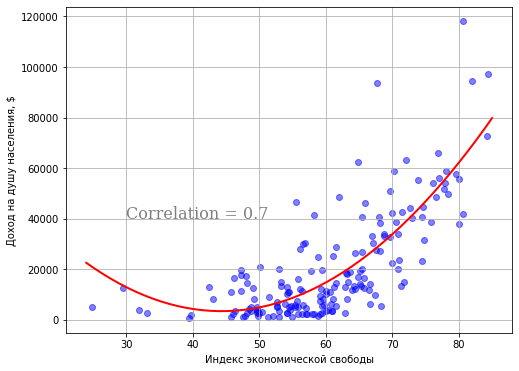

In [17]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))
ax1.scatter(score_gdp['score_2022'], score_gdp['gdp_per_capita'], color = 'b', alpha = 0.5)
x = np.linspace(24, 85)
ax1.plot(x, function(x), color='r', linewidth=2)
plt.grid()
plt.xlabel("Индекс экономической свободы")
plt.ylabel("Доход на душу населения, $")

font = {'family': 'serif',
        'color':  'grey',
        'weight': 'light',
        'size': 16}

plt.text(30, 40000, 'Correlation = 0.7', fontdict=font)
plt.show()

видна сильная положительная связь между индексом экономической свободы и уровнем дохода на душу населения

In [13]:
score_gdp[['score_2022', 'gdp_per_capita']].corr() # коэффициент корреляции

,score_2022,gdp_per_capita
score_2022,1.000000,0.702672
gdp_per_capita,0.702672,1.000000


### часть 2. Определение среднего ВВП в зависимости от категории Индекса

In [2]:
gdp_avg = pd.read_csv("gdp_avg.csv").sort_values(by = 'avg_gdp_per_capita', ascending = True)
gdp_avg

,avg_gdp_per_capita,rating
5,3020,not_grated
4,6874,repressed
3,9917,mostly_unfree
2,21803,moderately_free
1,42519,mostly_free
0,73973,free


In [3]:
x = gdp_avg['rating'].to_numpy()
y = gdp_avg['avg_gdp_per_capita'].to_numpy()

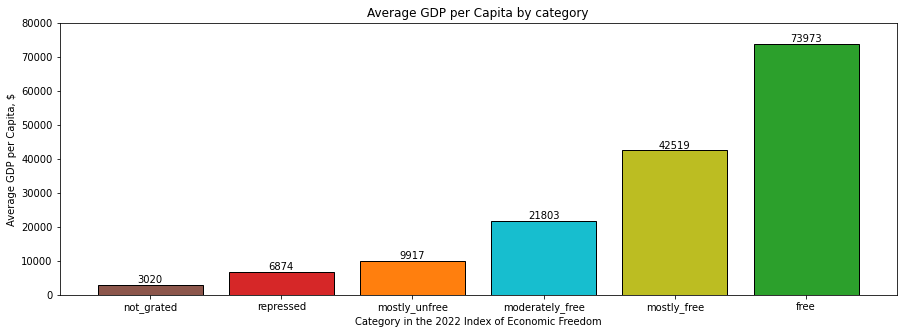

In [4]:
fig = plt.figure(figsize =(15, 5))

bar_labels = ['brown', 'lightgreen', 'yellow', 'red', 'purple', 'brown']
bar_colors = ['tab:brown', 'tab:red', 'tab:orange', 'tab:cyan', 'tab:olive', 'tab:green']

plt.bar(x, y,label = bar_labels, color= bar_colors, width = 0.8, ec = 'black')

for i in range(len(x)):
    plt.text(i, y[i], y[i], ha = 'center', va = 'bottom')
    
plt.xlabel('Category in the 2022 Index of Economic Freedom')

plt.ylabel('Average GDP per Capita, $')
plt.ylim([0,80000])
plt.title("Average GDP per Capita by category")
plt.show()

###  part 3. Index Freedom vs Legatum Prosperity

Условия предприятия. Некоторым НПО удалось повысить благосостояние на местном уровне, работая с местными предприятиями над выявлением препятствий на пути открытия, ведения и развития бизнеса и разрабатывая совместные подходы к их устранению на местном и национальном уровне.

Столп «Условия предприятия» измеряет степень, в которой нормативные положения позволяют предприятиям начинать, конкурировать и расширяться.

Условия предприятия измеряют, насколько легко компаниям начинать, конкурировать и расширяться. Конкурентоспособные рынки с низкими барьерами для входа важны для бизнеса, так как позволяют внедрять инновации и развивать новые идеи. Это необходимо для динамичной и предприимчивой экономики, где регулирование способствует развитию бизнеса и отвечает меняющимся потребностям общества.

In [5]:
legatum = pd.read_excel('legatum.xlsx')
legatum

,country_name,score_2022,enterprise_conditions
0,Albania,66.6,65
1,Algeria,45.8,132
2,Angola,52.6,160
3,Argentina,50.1,117
4,Armenia,65.3,48
...,...,...,...
152,Uzbekistan,55.7,105
153,Venezuela,24.8,167
154,Vietnam,60.6,83
155,Zambia,48.7,95


In [6]:
legatum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_name           157 non-null    object 
 1   score_2022             157 non-null    float64
 2   enterprise_conditions  157 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 3.8+ KB


In [7]:
legatum.describe()

,score_2022,enterprise_conditions
count,157.000000,157.000000
mean,60.289809,81.426752
std,11.151872,46.854549
min,24.800000,2.000000
25%,53.000000,41.000000
50%,59.600000,81.000000
75%,67.700000,120.000000
max,84.400000,167.000000


In [8]:
legatum[['score_2022', 'enterprise_conditions']].corr()

,score_2022,enterprise_conditions
score_2022,1.000000,-0.811559
enterprise_conditions,-0.811559,1.000000


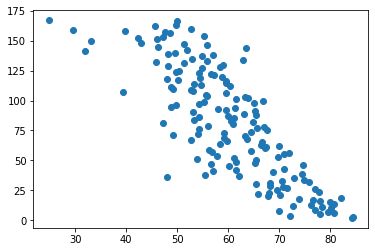

In [9]:
plt.scatter(legatum['score_2022'], legatum['enterprise_conditions'])
plt.show()

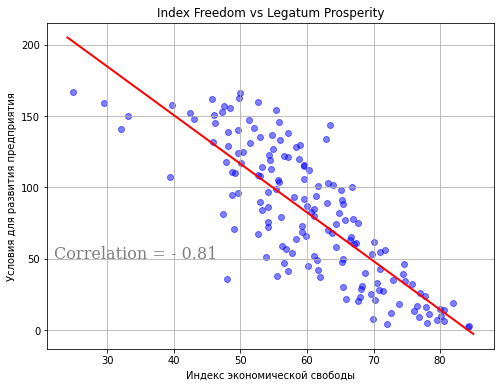

In [11]:
fig, ax2 = plt.subplots(1, 1, figsize=(8, 6))
ax2.scatter(legatum['score_2022'], legatum['enterprise_conditions'], color = 'b', alpha = 0.5)
x = np.linspace(24, 85)
ax2.plot(x, function2(x), color='r', linewidth=2)

font = {'family': 'serif',
        'color':  'grey',
        'weight': 'light',
        'size': 16}
plt.text(22, 50, 'Correlation = - 0.81', fontdict=font)

plt.grid()
plt.title("Index Freedom vs Legatum Prosperity")
plt.xlabel("Индекс экономической свободы")
plt.ylabel("Условия для развития предприятия");

## part 4. Index Freedom and Environmental Peformance

In [3]:
epi = pd.read_csv('epi.csv').sort_values(by = 'avg_epi', ascending = True)
epi

,avg_epi,rating
4,35.6,repressed
3,36.8,mostly_unfree
2,44.8,moderately_free
1,58.5,mostly_free
0,58.6,free


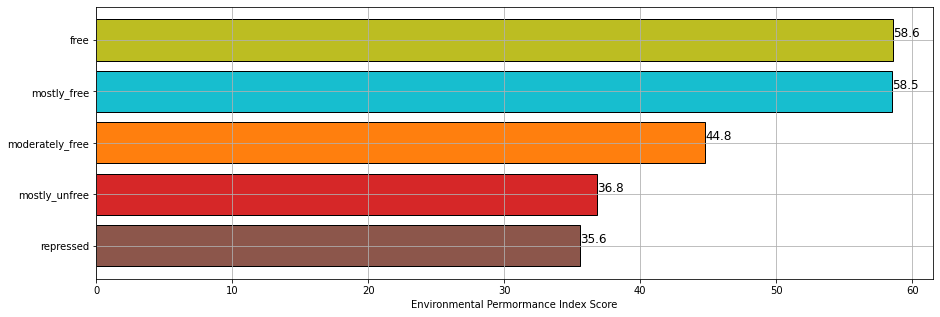

In [5]:
fig = plt.figure(figsize =(15, 5))
bar_colors = ['tab:brown', 'tab:red', 'tab:orange', 'tab:cyan', 'tab:olive', 'tab:green']
y4 = epi['avg_epi'].to_numpy()
x4 = epi['rating'].to_numpy()
plt.barh(x4, y4, color = bar_colors, ec = 'black')

for index, value in enumerate(y4):
    plt.text(value, index, str(value),fontsize = 12, ha ='left', va ='bottom')
plt.grid() 
    
plt.xlabel("Environmental Permormance Index Score")
plt.show();

## part 5. Economic Freedom 1995-2022

In [2]:
index_1995_2022 = pd.read_excel("index_1995_2022_avg_date.xlsx")
index_1995_2022.head()

,year,avg_index
0,1995-06-01,57.85
1,1996-06-01,56.90
2,1997-06-01,57.06
3,1998-06-01,57.02
4,1999-06-01,57.38


In [3]:
index_1995_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   year       28 non-null     datetime64[ns]
 1   avg_index  28 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 576.0 bytes


In [4]:
index_1995_2022.describe()

,avg_index
count,28.000000
mean,59.511786
std,1.330467
min,56.900000
25%,59.150000
50%,59.630000
75%,60.320000
max,61.590000


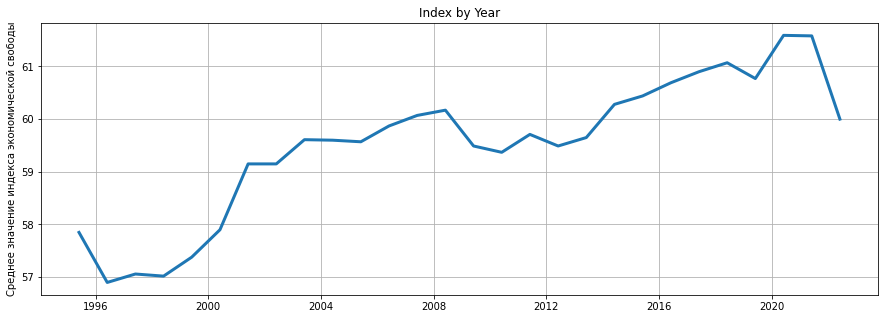

In [5]:
# plot by default
fig = plt.figure(figsize =(15, 5))
plt.plot(index_1995_2022.year, index_1995_2022.avg_index, linewidth=3)
plt.grid()
plt.title('Index by Year')
plt.ylabel('Среднее значение индекса экономической свободы')
plt.show()

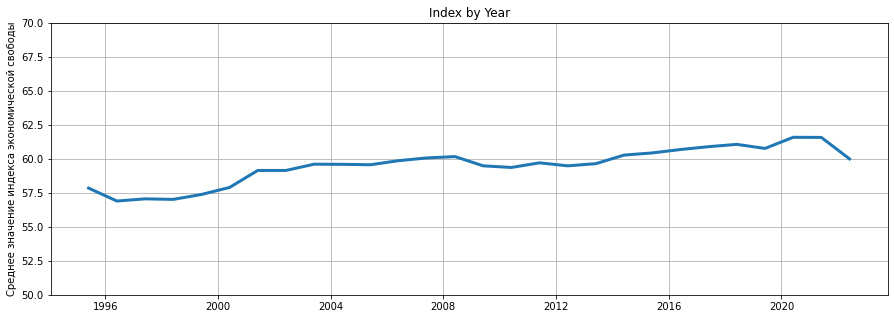

In [6]:
fig = plt.figure(figsize =(15, 5))
plt.plot(index_1995_2022.year, index_1995_2022.avg_index, linewidth=3)
plt.ylim([50, 70])
plt.grid(True)
plt.title('Index by Year')
plt.ylabel('Среднее значение индекса экономической свободы')
plt.show()